In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### importing the data

In [2]:
df=pd.read_csv("D:/data science projects/codesoft/IRIS.csv")

#### look of df

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

#### statistical parameters checking by

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### checking any presence of null values in df using

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


####  Exploratory data analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_37548\3346861480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


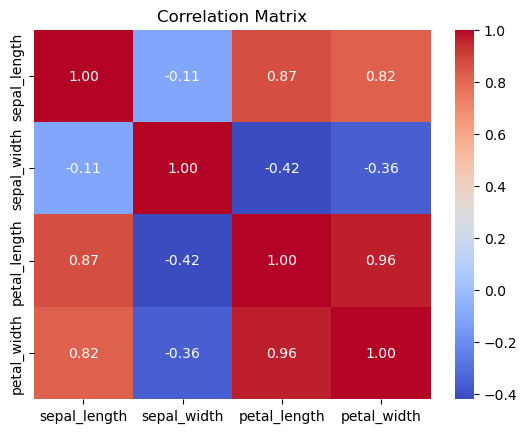

In [8]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

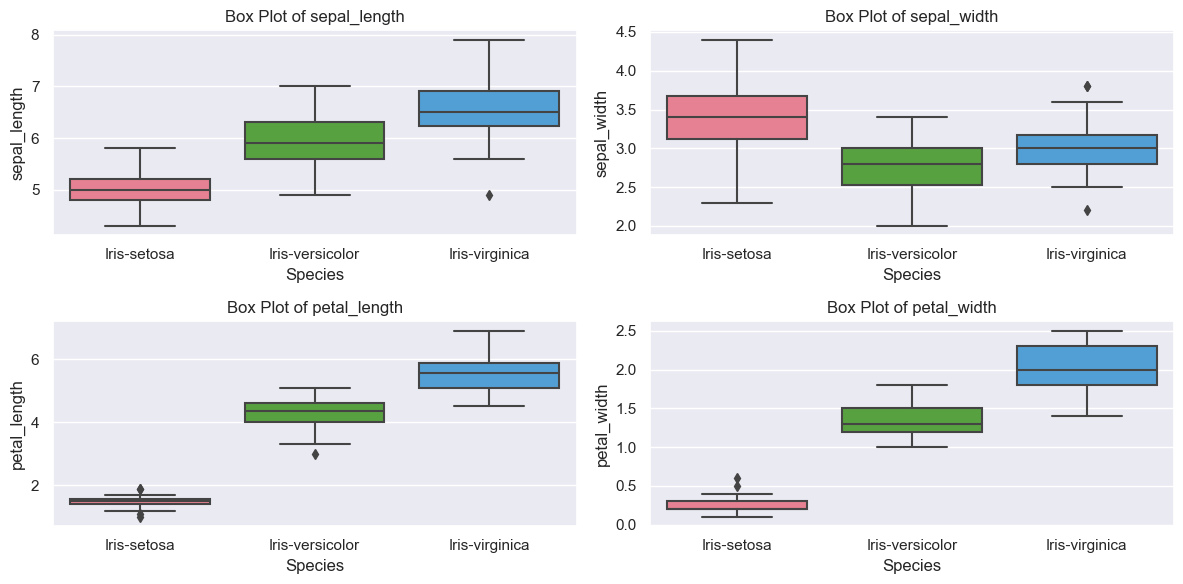

In [9]:
sns.set(style="darkgrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Define numeric attributes for Iris dataset
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Generate box plots
for i, column in enumerate(attributes, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df, palette='husl')  # Using the 'husl' color palette

    # Set title and labels
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Species')
    plt.ylabel(column)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### outliers are handling using Winsorize values (5th and 95th percentiles values)

In [10]:
setosa_quantiles = df[df['species'] == 'Iris-setosa']['petal_length'].quantile([0.05, 0.95])
print(setosa_quantiles)

0.05    1.2
0.95    1.7
Name: petal_length, dtype: float64


In [11]:
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species_with_outliers = {'Iris-setosa': ['petal_length', 'petal_width'],
                         'Iris-versicolor': ['petal_length'],
                         'Iris-virginica': ['sepal_length', 'sepal_width']}

# Winsorize values for 'Iris-setosa' and 'petal_length'
df.loc[(df['species'] == 'Iris-setosa') & (df['petal_length'] < 1.2), 'petal_length'] = 1.2
df.loc[(df['species'] == 'Iris-setosa') & (df['petal_length'] > 1.7), 'petal_length'] = 1.7

# Find and replace outliers with median for specific species and attributes
for species, outlier_columns in species_with_outliers.items():
    for column in outlier_columns:
        q_low = df[df['species'] == species][column].quantile(0.05)
        q_high = df[df['species'] == species][column].quantile(0.95)

        # Replace outliers with median
        median_value = df[df['species'] == species][column].median()
        df.loc[(df['species'] == species) & ((df[column] < q_low) | (df[column] > q_high)), column] = median_value



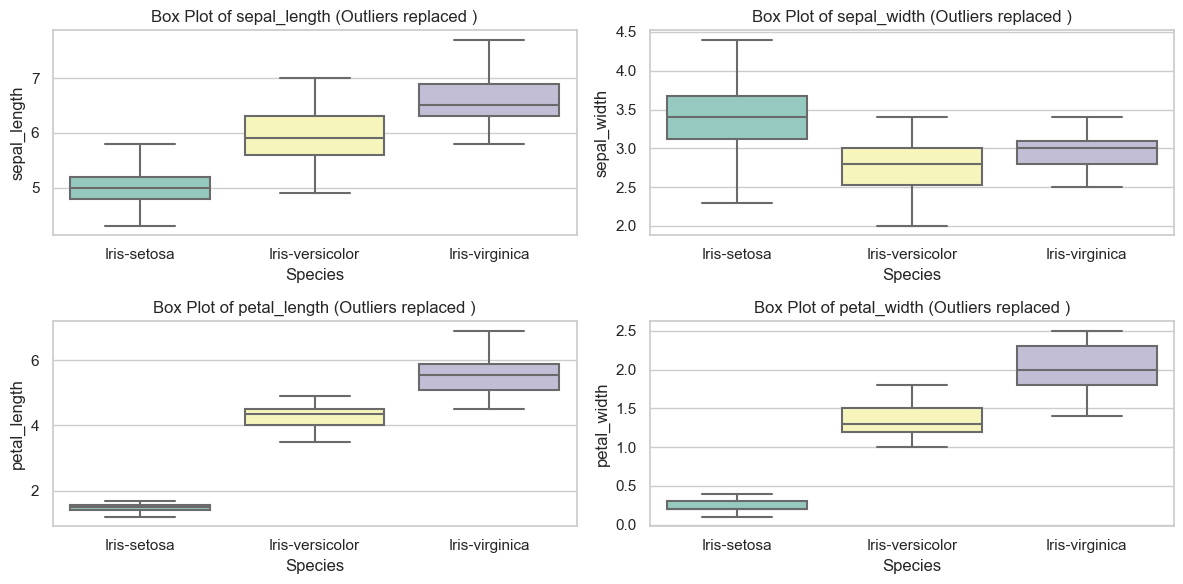

In [12]:
# Box plots for each attribute with 'species' as hue after handling outliers
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df, palette='Set3')

    plt.title(f'Box Plot of {column} (Outliers replaced )')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.856000,3.044667,3.771667,1.194000
std,0.813764,0.416688,1.759408,0.768178
min,4.300000,2.000000,1.200000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.475000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


#### Define features (X) and target variable (y)

In [14]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]  # Features
y = df['species']  # Target variable

#### Split the dataset into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### standerdizing datapoints

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
df_concatenated = pd.concat([X, y], axis=1)

# Fit MANOVA model
from statsmodels.multivariate.manova import MANOVA
manova_model = MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ species', data=df_concatenated)

# Display the results
print(manova_model.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0149 4.0000 144.0000 2378.1269 0.0000
         Pillai's trace  0.9851 4.0000 144.0000 2378.1269 0.0000
 Hotelling-Lawley trace 66.0591 4.0000 144.0000 2378.1269 0.0000
    Roy's greatest root 66.0591 4.0000 144.0000 2378.1269 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0224 8.0000 288.0000  204.6246 0.0000
         Pillai's trace  1.1903 8.0000 290.00

### Building  models

### Linear Discriminant Analysis (LDA)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
# Creating a Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()

In [20]:
# Fitting the model on the training set
lda_model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [21]:
# Make predictions on the test set
y_pred_lda = lda_model.predict(X_test_scaled)

In [22]:
# Evaluating the LDA model
from sklearn.metrics import accuracy_score,  confusion_matrix
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

In [23]:
# results
print(f"LDA Accuracy: {accuracy_lda:.4f}")
print("LDA Confusion Matrix:")
print(conf_matrix_lda)

LDA Accuracy: 1.0000
LDA Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


####  prediction for my new datapoint

In [24]:
new_data = pd.DataFrame({
    'sepal_length': [2.3],
    'sepal_width': [5.4],
    'petal_length': [5.6],
    'petal_width': [3.6]
})

In [25]:
predicted_species = lda_model.predict(new_data)
predicted_species

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


array(['Iris-virginica'], dtype='<U15')